In [1]:
import joblib
import numpy as np

In [2]:
weights_paillier, bias_paillier, unenc_preds_paillier, cpu_seconds_paillier, cpu_usages_paillier, ram_usages_paillier, train_time_paillier, test_time_paillier = joblib.load('variables_paillier.pkl')


In [3]:
weights_sk, bias_sk, unenc_preds_sk, cpu_seconds_sk, cpu_usages_sk, ram_usages_sk, train_time_sk, test_time_sk = joblib.load('variables_sklearn.pkl')
weights_sk=weights_sk[0]

In [4]:
weights_ckks, bias_ckks, unenc_preds_ckks, cpu_seconds_ckks, cpu_usages_ckks, ram_usages_ckks, train_time_ckks, test_time_ckks = joblib.load('variables_ckks.pkl')


### spearmann rank correlation value for ckks:

In [5]:
from scipy.stats import spearmanr
correlation, p_value = spearmanr(weights_sk, weights_ckks)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 0.9999999999999999
P-value: 1.4042654220543672e-24


### spearmann rank correlation value for paillier:

In [6]:
correlation, p_value = spearmanr(weights_sk, weights_paillier)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 0.9999999999999999
P-value: 1.4042654220543672e-24


### MSE for ckks model:

In [7]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(weights_sk, weights_ckks)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.7685795109002182e-15


### MSE for paillier model:

In [8]:
mse = mean_squared_error(weights_sk, weights_paillier)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.299345194441322e-26


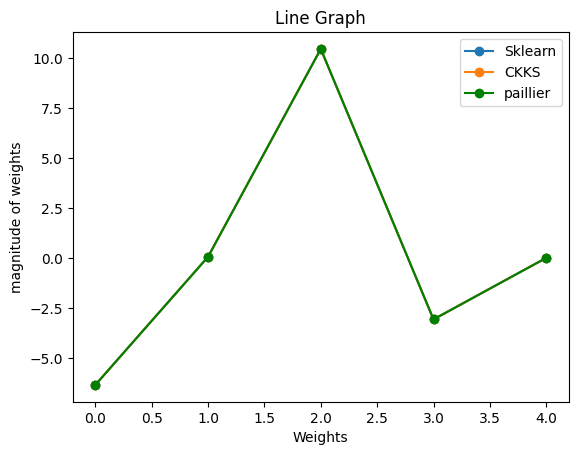

In [9]:
import matplotlib.pyplot as plt

plt.plot(weights_sk, label='Sklearn', marker='o')  
plt.plot(weights_ckks, label='CKKS', marker='o')  
plt.plot(weights_paillier, label='paillier', marker='o', color='green')  

plt.xlabel('Weights')
plt.ylabel('magnitude of weights')
plt.title('Line Graph')

plt.legend()

plt.show()

### MSE CKKS outputs

In [10]:
mse = mean_squared_error(unenc_preds_sk,unenc_preds_ckks)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.240199955654382e-10


### MSE Paillier outputs:

In [11]:
mse = mean_squared_error(unenc_preds_sk,unenc_preds_paillier)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4.364978430085943e-25


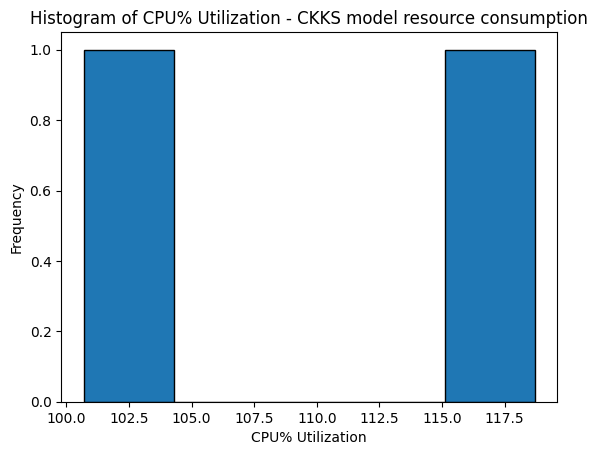

In [12]:
# Plot the histogram

filtered_ckks_cpu_util = [x for x in cpu_usages_ckks if x >= 50]

plt.hist(filtered_ckks_cpu_util, bins=5, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% Utilization - CKKS model resource consumption')
plt.xlabel('CPU% Utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [13]:
print(np.mean(filtered_ckks_cpu_util))
print(np.median(filtered_ckks_cpu_util))

109.7
109.7


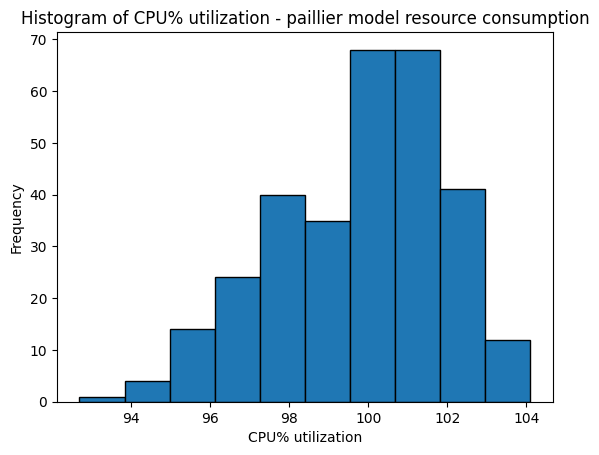

In [14]:
filtered_paillier_cpu_util = [x for x in cpu_usages_paillier if x >= 80]

plt.hist(filtered_paillier_cpu_util, bins=10, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% utilization - paillier model resource consumption')
plt.xlabel('CPU% utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [15]:
print(np.mean(filtered_paillier_cpu_util))
print(np.median(filtered_paillier_cpu_util))

99.77296416938111
100.1


Text(0.5, 1.0, 'Line Graph of ram% util for ckks model')

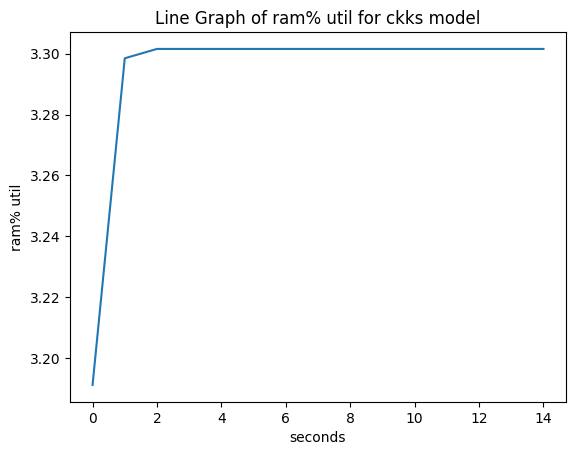

In [16]:
plt.plot(ram_usages_ckks)

# Add labels and title
plt.xlabel('seconds')
plt.ylabel('ram% util')
plt.title('Line Graph of ram% util for ckks model')

Text(0.5, 1.0, 'Line Graph of ram% util for paillier model')

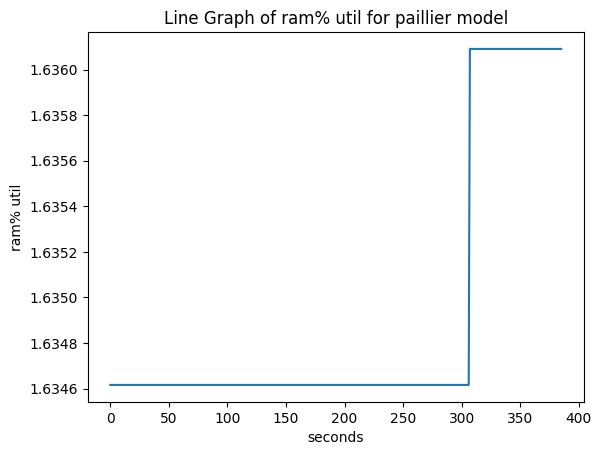

In [17]:
plt.plot(ram_usages_paillier)

# Add labels and title
plt.xlabel('seconds')
plt.ylabel('ram% util')
plt.title('Line Graph of ram% util for paillier model')

In [18]:
np.median(ram_usages_paillier)

1.6346161080955812

In [19]:
train_time_ckks

3.027052164077759

In [20]:
train_time_paillier

321.9534664154053

In [21]:
test_time_ckks

2.7319047451019287

In [22]:
test_time_paillier

16.48080277442932

In [23]:
def average_consecutive_difference(arr):
    if len(arr) < 2:
        # If the array has less than 2 elements, return 0 as the average difference is not defined
        return 0

    # Calculate the differences between consecutive elements
    differences = [abs(arr[i] - arr[i - 1]) for i in range(1, len(arr))]

    differences_1 = [x for x in differences if x > 0]
    return differences_1

    # # Calculate the average of the differences
    # average_difference = sum(differences) / len(differences)
    # return differences, average_difference


### ram usage analysis: (for ckks)

In [24]:
p = average_consecutive_difference(ram_usages_ckks)

In [25]:
p

[0.10726497488572972, 0.0030698730186151657]

In [26]:
np.median(p)

0.055167423952172445

In [27]:
np.mean(p)

0.055167423952172445

In [28]:
import pandas as pd
y_test=pd.read_csv('y_test3.csv')
y_test=y_test.to_numpy()
y_test=y_test.reshape(-1)

unenc_preds_sk=np.array(unenc_preds_sk)
unenc_preds_sk=unenc_preds_sk.reshape(-1)

unenc_preds_ckks=np.array(unenc_preds_ckks)
unenc_preds_ckks=unenc_preds_sk.reshape(-1)

### mse for sklearn model

In [29]:
mse=mean_squared_error(y_test,unenc_preds_sk)
mse

333.73822617213966

### mse for ckks model:

In [30]:
mse=mean_squared_error(y_test,unenc_preds_ckks)
mse

333.73822617213966

### mse for paillier model:

In [31]:
mse=mean_squared_error(y_test,unenc_preds_paillier)
mse

333.7382261721362